In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from functions import *
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('../data/salaries.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12869 entries, 0 to 12868
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           12869 non-null  int64 
 1   experience_level    12869 non-null  object
 2   employment_type     12869 non-null  object
 3   job_title           12869 non-null  object
 4   salary              12869 non-null  int64 
 5   salary_currency     12869 non-null  object
 6   salary_in_usd       12869 non-null  int64 
 7   employee_residence  12869 non-null  object
 8   remote_ratio        12869 non-null  int64 
 9   company_location    12869 non-null  object
 10  company_size        12869 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.1+ MB


In [4]:
data.kurt(numeric_only=True)

work_year           2.615312
salary           3260.771792
salary_in_usd       6.724388
remote_ratio       -1.530245
dtype: float64

In [5]:
data['salary'].describe()

count    1.286900e+04
mean     1.672187e+05
std      3.808204e+05
min      1.400000e+04
25%      1.040000e+05
50%      1.422000e+05
75%      1.880000e+05
max      3.040000e+07
Name: salary, dtype: float64

<Axes: >

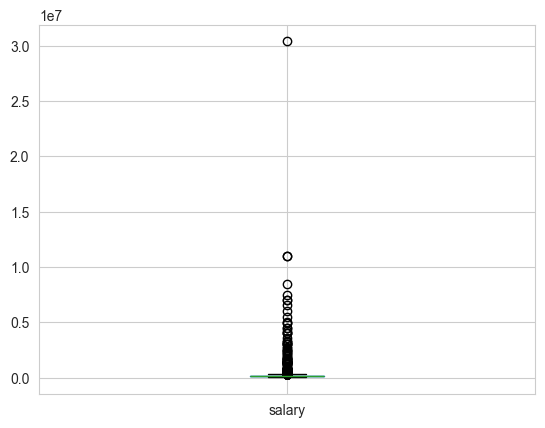

In [6]:
data.boxplot(column=['salary'])

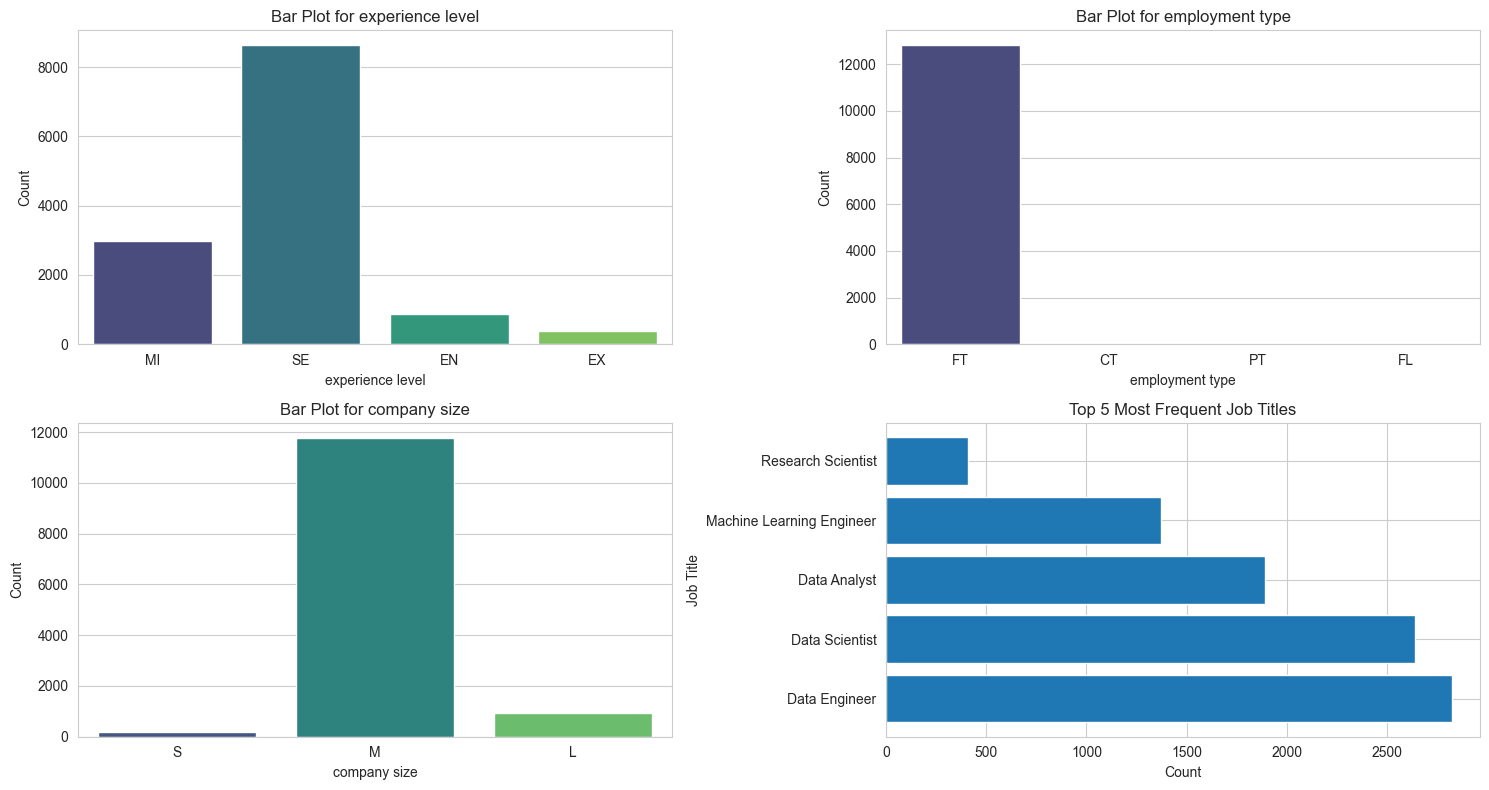

In [7]:
# Extract top job titles and filter data
top_job_titles = data['job_title'].value_counts().nlargest(5).index

filtered_data = data[data['job_title'].isin(top_job_titles)]


# Set up a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Plot bar charts for selected columns
selected_columns = ['experience_level', 'employment_type', 'company_size']
for i, column in enumerate(selected_columns):
    sns.countplot(x=column, data=data, palette="viridis", hue=column, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Bar Plot for {column.replace("_", " ")}')
    axes[i//2, i%2].set_xlabel(column.replace("_", " "))
    axes[i//2, i%2].set_ylabel('Count')

# Plot horizontal bar chart for top job titles
axes[1, 1].barh(top_job_titles, filtered_data['job_title'].value_counts().loc[top_job_titles])
axes[1, 1].set_title('Top 5 Most Frequent Job Titles')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Job Title')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\Ferna\AppData\Local\Temp\ipykernel_25352\4190449411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='experience_level', y='salary_in_usd', data=data, palette='viridis')


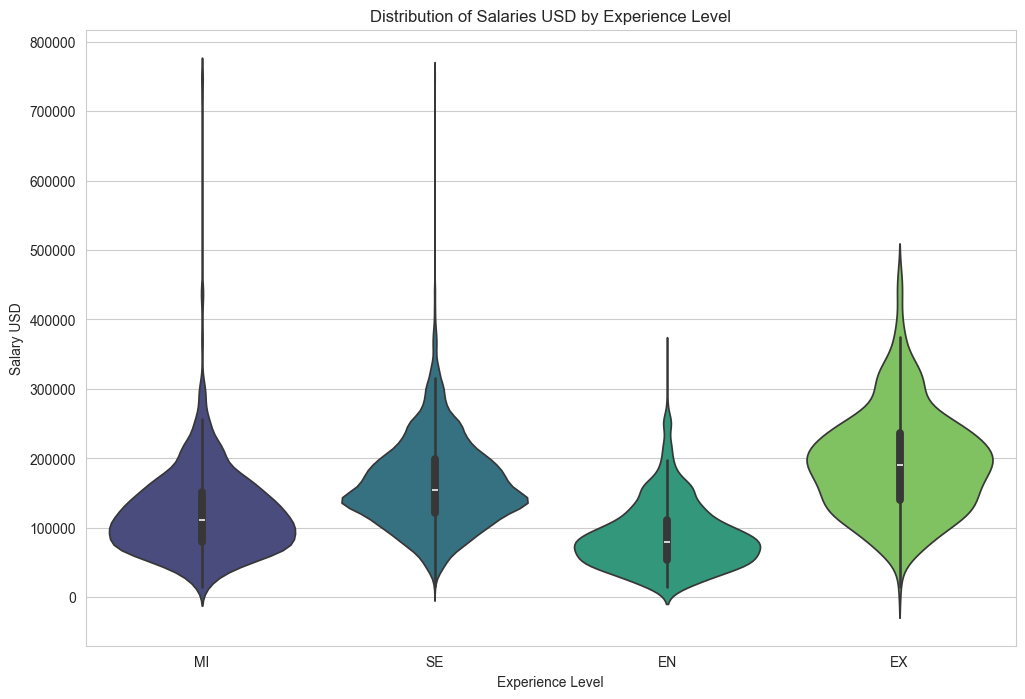

In [8]:
# Violin plot  for experience_level/salary_in_usd
plt.figure(figsize=(12, 8))
sns.violinplot(x='experience_level', y='salary_in_usd', data=data, palette='viridis')

plt.xlabel('Experience Level')
plt.ylabel('Salary USD')
plt.title('Distribution of Salaries USD by Experience Level')

plt.show()

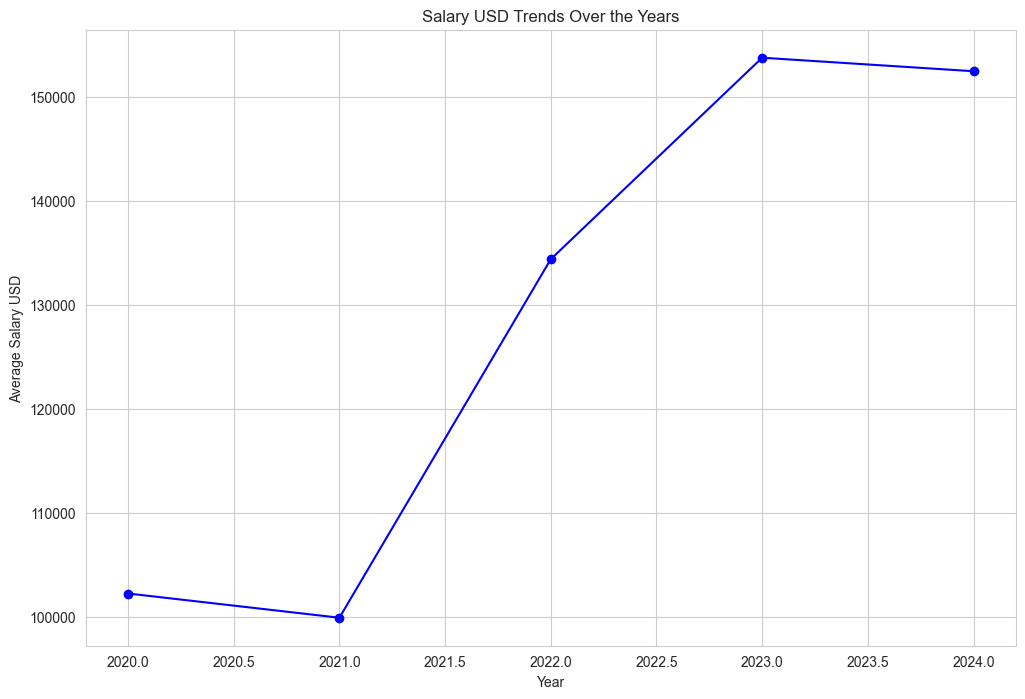

In [9]:
# Salary trend throughout the years
average_salary_per_year = data.groupby('work_year')['salary_in_usd'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_salary_per_year.index, average_salary_per_year.values, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Average Salary USD')
plt.title('Salary USD Trends Over the Years')

plt.grid(True)
plt.show()

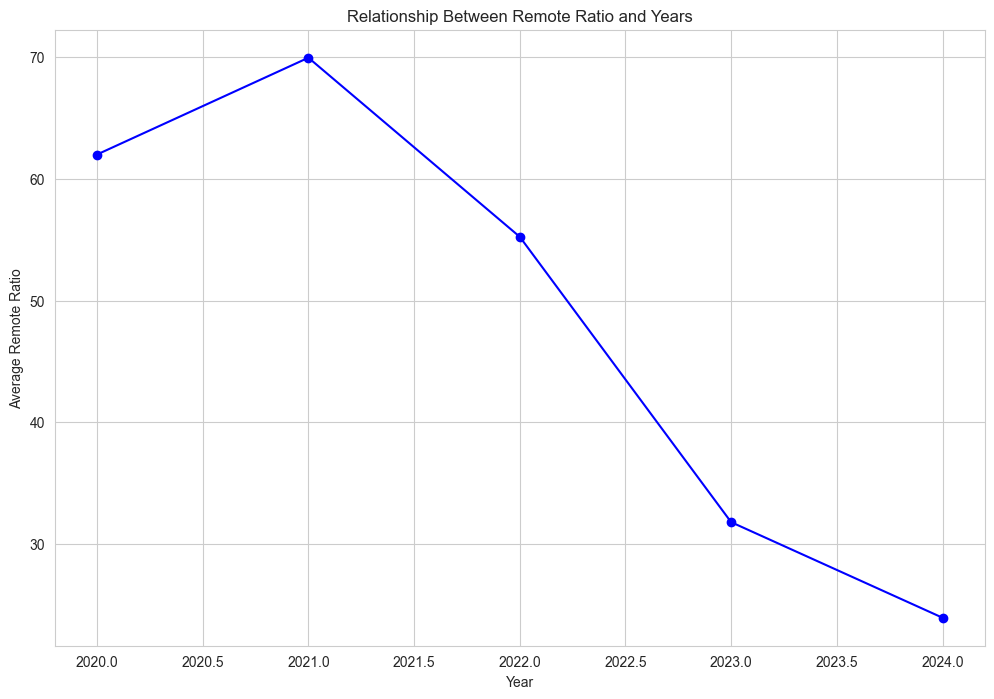

In [10]:
# Remote ration trends throughout the years
average_remote_ratio_per_year = data.groupby('work_year')['remote_ratio'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_remote_ratio_per_year.index, average_remote_ratio_per_year.values, marker='o', linestyle='-', color='b')

plt.xlabel('Year')
plt.ylabel('Average Remote Ratio')
plt.title('Relationship Between Remote Ratio and Years')

plt.grid(True)
plt.show()

In [11]:
sns.pairplot(data)

In [12]:
# Where we look at categorical data and decide what to do with it. 
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 
                       'employee_residence', 'company_location', 'company_size']

unique_values = {column: data[column].unique() for column in categorical_columns}

unique_values


{'experience_level': array(['MI', 'SE', 'EN', 'EX'], dtype=object),
 'employment_type': array(['FT', 'CT', 'PT', 'FL'], dtype=object),
 'job_title': array(['AI Programmer', 'Data Analyst', 'Machine Learning Scientist',
        'Data Architect', 'Machine Learning Engineer', 'Data Manager',
        'Data Engineer', 'Business Intelligence Engineer',
        'Data Scientist', 'Applied Scientist', 'Data Science',
        'Data Developer', 'AI Engineer', 'BI Developer', 'ETL Engineer',
        'Data Modeler', 'ML Engineer', 'Robotics Software Engineer',
        'Analytics Engineer', 'Business Intelligence', 'Head of Data',
        'AI Product Manager', 'Research Scientist', 'Research Engineer',
        'Research Analyst', 'Business Intelligence Analyst',
        'Business Intelligence Developer', 'Data Product Manager',
        'AI Architect', 'Business Intelligence Lead',
        'Data Management Specialist', 'Data Operations Associate',
        'Data Science Manager', 'Data Management Anal

In [13]:
# Too many job titles so we condense them into categories.
data['job_category'] = data['job_title'].apply(categorize_job_title)
data = data.drop('job_title',axis=1)

print(data['job_category'].unique())


['Machine Learning & AI' 'Data Science & Analytics' 'Data Engineering'
 'Management & Operations' 'Business Intelligence' 'Others'
 'Software Engineering' 'Research']


In [14]:
# Too many countries so we created a map and categorized them into regions.
data['employee_residence'] = data['employee_residence'].replace(region_mapping)
data['company_location'] = data['company_location'].replace(region_mapping)

print(data['employee_residence'].unique())
print(data['company_location'].unique())



['Eastern Europe' 'North America' 'Western Europe' 'Latin' 'Oceania'
 'Africa' 'Asia' 'Middle East']
['Eastern Europe' 'North America' 'Western Europe' 'Latin' 'Oceania'
 'Africa' 'Asia' 'Middle East']


In [15]:
newCatColumns = ['experience_level', 'employment_type', 'job_category', 'salary_currency', 
                       'employee_residence', 'company_location', 'company_size']
uniqueValues = {column: data[column].unique() for column in newCatColumns}

uniqueValues

{'experience_level': array(['MI', 'SE', 'EN', 'EX'], dtype=object),
 'employment_type': array(['FT', 'CT', 'PT', 'FL'], dtype=object),
 'job_category': array(['Machine Learning & AI', 'Data Science & Analytics',
        'Data Engineering', 'Management & Operations',
        'Business Intelligence', 'Others', 'Software Engineering',
        'Research'], dtype=object),
 'salary_currency': array(['USD', 'GBP', 'EUR', 'CAD', 'NZD', 'AUD', 'INR', 'PLN', 'BRL',
        'PHP', 'TRY', 'CHF', 'NOK', 'JPY', 'ZAR', 'HKD', 'SGD', 'ILS',
        'THB', 'HUF', 'DKK', 'MXN', 'CLP'], dtype=object),
 'employee_residence': array(['Eastern Europe', 'North America', 'Western Europe', 'Latin',
        'Oceania', 'Africa', 'Asia', 'Middle East'], dtype=object),
 'company_location': array(['Eastern Europe', 'North America', 'Western Europe', 'Latin',
        'Oceania', 'Africa', 'Asia', 'Middle East'], dtype=object),
 'company_size': array(['S', 'M', 'L'], dtype=object)}

In [16]:
# these are oridnal so we can map them to numbers instead of one hot encoding them
experience_level_mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
company_size_mapping = {'S': 1, 'M': 2, 'L': 3}
remote_ratio_mapping = {0: 0, 50: .5, 100: 1}

data['experience_level'] = data['experience_level'].map(experience_level_mapping)
data['company_size'] = data['company_size'].map(company_size_mapping)
data['remote_ratio'] = data['remote_ratio'].map(remote_ratio_mapping)


In [17]:
# Reduce Redundancy
data = data.drop('salary_currency',axis=1)
data = data.drop('salary',axis=1)


In [18]:
data.head()


,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2024,2,FT,30000,Eastern Europe,0.0,Eastern Europe,1,Machine Learning & AI
1,2024,2,FT,75000,North America,1.0,North America,2,Data Science & Analytics
2,2024,3,FT,250000,North America,1.0,North America,2,Machine Learning & AI
3,2024,3,FT,125000,North America,1.0,North America,2,Machine Learning & AI
4,2024,1,FT,83300,North America,0.0,North America,2,Data Science & Analytics


In [19]:
# one hot encode the categorical columns that arent ordinal, then pca them. introduce more dimensions and then reduce them.

columns_to_encode = ['employment_type','job_category', 'employee_residence', 'company_location'] # year?? im not sure

encoder = OneHotEncoder(sparse_output=False)

def determine_n_components(unique_values_count):
    return min(max((unique_values_count + 19) // 5, 2), 10) # minimum of 2 and maximum of 10

for column in columns_to_encode:
    unique_values_count = len(data[column].unique())
    n_components = determine_n_components(unique_values_count)
    # n_components = 2

    
    encoded_data = encoder.fit_transform(data[[column]])
    
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(encoded_data)
    
    new_columns = [f"{column}_pca_{i}" for i in range(n_components)]
    
    data.drop(column, axis=1, inplace=True)
    
    for i, new_column in enumerate(new_columns):
        data[new_column] = reduced_data[:, i]



# encoder = OneHotEncoder(sparse=False)

# for column in columns_to_encode:
#     # Perform one-hot encoding on the column
#     encoded_data = encoder.fit_transform(data[[column]])
    
#     # Create new column names for the one-hot encoded features
#     new_columns = encoder.get_feature_names_out([column])
    
#     # Drop the original column from the DataFrame
#     data.drop(column, axis=1, inplace=True)
    
#     # Add the one-hot encoded columns to the DataFrame
#     for i, new_column in enumerate(new_columns):
#         data[new_column] = encoded_data[:, i]



In [20]:
data.head()


,work_year,experience_level,salary_in_usd,remote_ratio,company_size,employment_type_pca_0,employment_type_pca_1,employment_type_pca_2,employment_type_pca_3,job_category_pca_0,...,employee_residence_pca_0,employee_residence_pca_1,employee_residence_pca_2,employee_residence_pca_3,employee_residence_pca_4,company_location_pca_0,company_location_pca_1,company_location_pca_2,company_location_pca_3,company_location_pca_4
0,2024,2,30000,0.0,1,-0.005344,-0.000082,-0.000155,2.354987e-15,-0.026251,...,0.678935,0.789100,0.712431,-0.423924,-0.123252,0.671493,0.858299,-0.706061,-0.315635,-0.106764
1,2024,2,75000,1.0,2,-0.005344,-0.000082,-0.000155,-2.412945e-14,-0.076612,...,-0.129516,-0.011105,-0.000551,-0.000717,-0.000464,-0.126266,-0.010006,-0.000092,-0.000655,-0.000397
2,2024,3,250000,1.0,2,-0.005344,-0.000082,-0.000155,3.659799e-14,-0.026251,...,-0.129516,-0.011105,-0.000551,-0.000717,-0.000464,-0.126266,-0.010006,-0.000092,-0.000655,-0.000397
3,2024,3,125000,1.0,2,-0.005344,-0.000082,-0.000155,8.319852e-18,-0.026251,...,-0.129516,-0.011105,-0.000551,-0.000717,-0.000464,-0.126266,-0.010006,-0.000092,-0.000655,-0.000397
4,2024,1,83300,0.0,2,-0.005344,-0.000082,-0.000155,8.319852e-18,-0.076612,...,-0.129516,-0.011105,-0.000551,-0.000717,-0.000464,-0.126266,-0.010006,-0.000092,-0.000655,-0.000397


<Figure size 1000x1000 with 0 Axes>

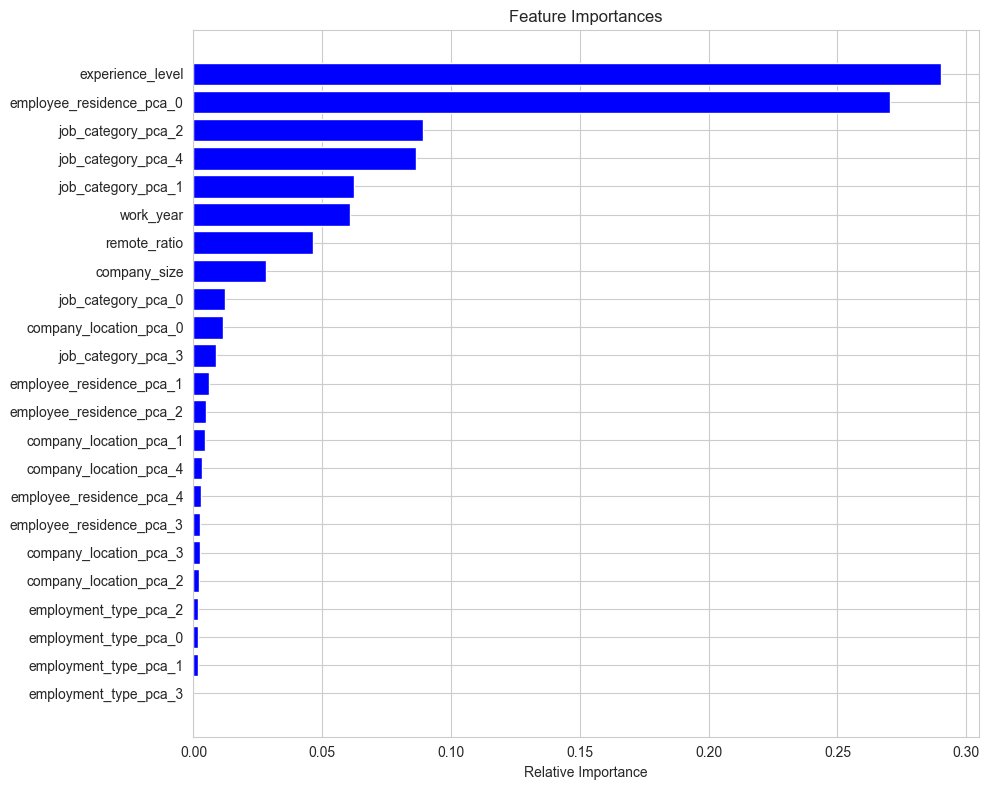

In [21]:
# use random forest to see the most important features. 

X = data.drop(['salary_in_usd'], axis=1)
y = data['salary_in_usd']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

features = X.columns
importances = rf.feature_importances_
plt.clf()

indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()
# we can choose which ones to use when creating the model. feature selction

In [22]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Select the top 10 features based on importance
# top_10_features = [features[i] for i in indices[-12:]]

# # Subset the data to include only the top 10 features
# X_top_features = X[top_10_features]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# # Initialize the models
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# # Placeholder for other models, e.g., XGBoost or LightGBM

# # Train the Random Forest model
# rf_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred_rf = rf_model.predict(X_test)

# # Calculate and print metrics for Random Forest
# print("Random Forest Regressor Metrics:")
# print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
# print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred_rf, squared=False))
# print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf))
# print("R^2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regressor Metrics:
Mean Squared Error (MSE): 3377405623.7830796
Root Mean Squared Error (RMSE): 58115.45081803186
Mean Absolute Error (MAE): 42218.985242575
R^2 Score: 0.27503697865670174


In [23]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam

# # Define the neural network model
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(32, activation='relu'),
#     Dense(1)  # Output layer for regression (single neuron, no activation)
# ])

# # Compile the model specifying the optimizer, loss function, and metrics
# model.compile(optimizer=Adam(learning_rate=0.01),
#               loss='mean_squared_error',
#               metrics=['mae', 'mse'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# # Evaluate the model on the test set
# test_loss, test_mae, test_mse = model.evaluate(X_test, y_test, verbose=1)

# print(f"Test Loss: {test_loss}")
# print(f"Test MAE: {test_mae}")
# print(f"Test MSE: {test_mse}")




Epoch 1/100


258/258 [==============================] - 1s 1ms/step - loss: 7061716480.0000 - mae: 63092.9766 - mse: 7061716480.0000 - val_loss: 4851772928.0000 - val_mae: 51987.7656 - val_mse: 4851772928.0000
Epoch 2/100
258/258 [==============================] - 0s 952us/step - loss: 4531554304.0000 - mae: 51290.5234 - mse: 4531554304.0000 - val_loss: 4832935424.0000 - val_mae: 51901.0977 - val_mse: 4832935424.0000
Epoch 3/100
258/258 [==============================] - 0s 949us/step - loss: 4490588672.0000 - mae: 51080.7969 - mse: 4490588672.0000 - val_loss: 4821045760.0000 - val_mae: 52202.1172 - val_mse: 4821045760.0000
Epoch 4/100
258/258 [==============================] - 0s 922us/step - loss: 4503557120.0000 - mae: 51176.4453 - mse: 4503557120.0000 - val_loss: 4892800000.0000 - val_mae: 53428.6211 - val_mse: 4892800000.0000
Epoch 5/100
258/258 [==============================] - 0s 969us/step - loss: 4459059200.0000 - mae: 50954.0156 - mse: 4459059200.0000 - val_loss: 47998853